# Марковская цепь

Материалы и датасеты для занятия можно найти в [репозитории](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4) GitHub или на [гугл-диске](https://drive.google.com/drive/folders/1Y1kXHasr5_hompZatPmdGaRkDYoxxqQ3?usp=sharing)

Пусть $E$ - некоторое дискретное (конечное или счётное) множество, которое называют пространством состояний.

**Примеры:**
- $E1=\{солнечно,пасмурно,дождь,снег\}$ - пространство погодных условий
- $E2=\{а,б,…,я\}$ - пространство кириллических букв
- $E3=ℕ=\{0,1,…,\}$ - пространство целых чисел (число студентов в классе)

Если система находится в состоянии $i \in E$ в момент времени $n$, то в момент времени $n+1$ она может перейти в состояние $j \in E$ с переходной вероятностью $p_{ij}$.

Например для кириллицы $p_{п,р}=0.278$  $p_{п,ы}=0.009$

# Оценка матрицы переходных вероятностей

Дана последовательность наблюдений

$X_1,X_2,…,X_N X_i \in E$.

Как подсчитать матрицу переходных вероятностей $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**Закон больших чисел:**
Частота некоторого события в серии независимых испытаний приближается (и остается близкой) к его вероятности:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$
$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
with open('alice_en.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^a-z]','', text)

In [3]:
ENGLISH = 'abcdefghijklmnopqrstuvwxyz'
POS = {l: i for i, l in enumerate(ENGLISH)}

In [4]:
probabilities = np.zeros((len(ENGLISH), len(ENGLISH)))

In [5]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [6]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [7]:
df = pd.DataFrame(probabilities, index=(c for c in ENGLISH), columns=(c for c in ENGLISH))

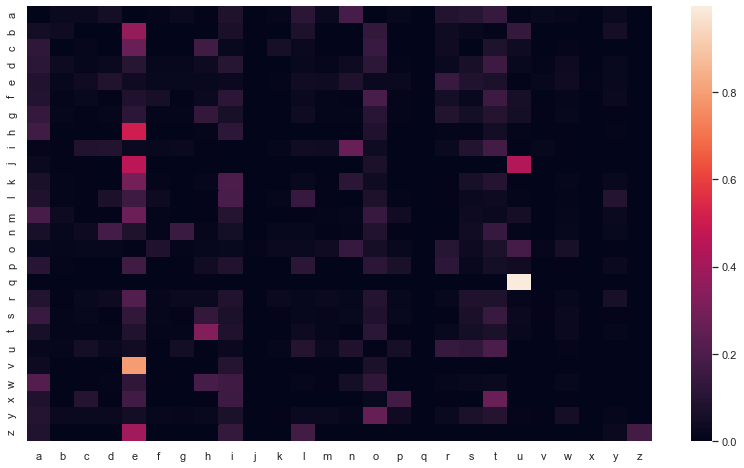

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

### Практика - постройте матрицу вероятности для русской версии книги

# Траектория в цепи

Теперь вопрос: допустим, что у нас есть какая-то траектория (последовательность состояний). Какова её вероятность? Ответ на этот вопрос даст одна простая теорема.

**Теорема о состояниях марковской цепи**

Для любого натурального $n$ и любых $i_0,i_1,…,i_{n−1},i,j$

$P(X_0=i_0,X_1=i_1,…,X_n=i_n)=α_{i_0}p_{i_0i_1}…p{i_{n−1}i_n}.$

Пример: Пусть вероятность начального состояния цепи для букв английского алфавита равна $\dfrac{1}{26}$.
Чему равна вероятность наблюдать строку "hello"?

In [9]:
string = "hello"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

5.348363016330027e-07


**Следствие.** Для любого натурального $n$ и любого $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,…,i_{n−1} \in E} \alpha i_0p_{i_0i_1}…p_{i_{n−1}i_n}$.

Но обычно нас не интересует полный путь, а лишь начало и конец. Поэтому вводят вероятность перейти из состояния $i$ в состояние $j$ за $n$ шагов:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

Чему равна эта вероятность?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,…,i_{n−1} \in E} p_{ii_1}...p_{i_{n-1}j}$

Если мы посмотрим на случай $n=2$, то полученное выражение очень похоже на скалярное произведение строк матрицы переходной вероятности. Оказывается, что это не так уж и далеко от истины.

**Теорема.** Пусть $P^{(n)}=(p_{ij}^{(n)}) i,j \in E$. Тогда $P^{(n)}=P⋅P⋅…⋅P=P^n$

**Вопрос:** как подсчитать вероятность, что слово из 3 букв начинается на букву "h" и заканчивается на букву "y"?

In [10]:
start = POS['h']
end = POS['y']
prior = 1. / len(ENGLISH)
for c in ENGLISH:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['h', c, 'y']), proba)

hay 0.00019786241179454468
hby 3.2498131357446945e-06
hcy 2.5963886570530186e-07
hdy 2.00246712505073e-06
hey 0.00041670464060019366
hfy 2.4496387427496224e-06
hgy 2.2022341052346015e-07
hhy 3.0694052582470812e-06
hky 1.0202901705244971e-07
hly 6.987940162352581e-06
hmy 4.054691865351508e-06
hny 1.0187698076726042e-06
hoy 2.0758961455728112e-05
hpy 2.095534994542692e-06
hry 2.9097918521227684e-05
hsy 2.6301624264116166e-06
hty 2.5534949950507335e-05
huy 2.316043298098595e-07
hvy 3.0372085380791536e-08
hwy 6.902550257831721e-07
hyy 4.816238159185105e-06


Это работает не всегда. Почему же? Потому что никто не обещал, что переходная вероятность не зависит от шага. Если она действительно не зависит, то говорят, что марковская цепь однородна.

# Генерирование выборок из марковской цепи

Как создать реализацию длины $N$ из марковской цепи?
Сгенерировать начальное состояние согласно распределению $\alpha_i≡P(X_0=i)$, положить $n \leftarrow 0$.
Пока $n<N$, повторять:
- Имея контекст $X_n$, сгенерировать состояние $X_{n+1}$ из распределения $P(X_{n+1}|X_n)$
- Положить $n \leftarrow n+1$

In [11]:
s = []
start = np.random.choice(list(ENGLISH))
s.append(start)
length = 10
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(ENGLISH), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

urrthetimei


### Практика: сгенерируйте все возможные комбинации строк из марковской цепи (длины 3) и отобразите их вероятность

In [12]:
def get_letter_and_prob(prev_letter = None):
    if prev_letter is None:
        for s in list(ENGLISH):
            yield s, 1.0/26.0
    else:
        p = POS[prev_letter] 
        prob = probabilities[p]
        for s in list(ENGLISH):
            sp = POS[s]
            yield s, prob[sp] 

In [13]:
for s1, p1 in get_letter_and_prob():
    for s2, p2 in get_letter_and_prob(s1):
        for s3, p3 in get_letter_and_prob(s2):
            prob = p1 * p2 * p3
            if prob > 0:
                print(s1+s2+s3, prob)

aaa 4.840796504656876e-08
aab 1.2190005743545041e-06
aac 1.1573904370225076e-06
aad 2.2663729089984464e-06
aae 8.80144819028523e-09
aaf 4.796789263705451e-07
aag 1.1441882647370798e-06
aah 2.112347565668455e-07
aai 3.370954656879243e-06
aaj 6.601086142713921e-08
aak 6.028992010345381e-07
aal 5.003623296177152e-06
aam 1.0825781274050831e-06
aan 7.930104819446991e-06
aao 2.6404344570855687e-08
aap 8.097332335062411e-07
aaq 1.3202172285427844e-08
aar 3.859435031440073e-06
aas 4.435929887903756e-06
aat 6.178616629580231e-06
aau 3.7406154808712227e-07
aav 9.153506117896639e-07
aaw 5.632926841782547e-07
aax 5.2808689141711375e-08
aay 1.3070150562573565e-06
aaz 2.2003620475713073e-08
aba 5.289730051449561e-05
abb 4.1073198046549535e-05
abd 6.223211825234778e-07
abe 0.0004045087686402606
abh 6.223211825234778e-07
abi 7.467854190281734e-05
abj 4.978569460187823e-06
abl 8.027943254552863e-05
abm 6.223211825234778e-07
abn 1.2446423650469557e-06
abo 0.00014375619316292338
abp 1.8669635475704334e-0

dfi 8.228639277778388e-05
dfj 2.981391042673329e-07
dfk 8.944173128019986e-07
dfl 1.669578983897064e-05
dfm 8.049755815217987e-06
dfn 4.770225668277326e-06
dfo 0.00013535515333736912
dfp 8.049755815217987e-06
dfq 5.962782085346658e-07
dfr 3.7565527137683944e-05
dfs 1.6099511630435974e-05
dft 0.0001106096076831805
dfu 4.1441335493159273e-05
dfv 2.6832519384059957e-06
dfw 1.1031146857891318e-05
dfy 1.8782763568841972e-05
dga 8.617237225853394e-05
dgb 8.196884190445911e-06
dgc 4.203530354074826e-06
dgd 7.356178119630946e-06
dge 6.977860387764211e-05
dgf 6.935825084223463e-06
dgg 4.83405990718605e-06
dgh 8.259937145757034e-05
dgi 3.993353836371085e-05
dgj 8.407060708149653e-07
dgk 2.1017651770374132e-07
dgl 2.227871087659658e-05
dgm 5.674765978001016e-06
dgn 6.30529553111224e-06
dgo 6.599542655897478e-05
dgp 5.8849424957047575e-06
dgq 1.2610591062224478e-06
dgr 5.632730674460268e-05
dgs 3.341806631489487e-05
dgt 5.8008718886232604e-05
dgu 3.362824283259861e-05
dgv 3.362824283259861e-06
dgw

eev 2.5727714303804426e-05
eew 6.885326819829627e-05
eex 1.2863857151902213e-05
eey 3.458479627724529e-05
eez 1.4761803289068112e-06
efa 8.055334428316887e-05
efb 8.53791206687965e-06
efc 1.7818251270009703e-05
efd 4.083349249377224e-06
efe 7.350028648879002e-05
eff 5.4568394514404716e-05
efg 4.454562817502426e-06
efh 2.4128881928138138e-05
efi 0.00010245494480255579
efj 3.7121356812520214e-07
efk 1.1136407043756065e-06
efl 2.078795981501132e-05
efm 1.0022766339380458e-05
efn 5.939417090003234e-06
efo 0.00016853095992884175
efp 1.0022766339380458e-05
efq 7.424271362504043e-07
efr 4.6772909583775465e-05
efs 2.0045532678760915e-05
eft 0.00013772023377445
efu 5.1598685969403096e-05
efv 3.340922113126819e-06
efw 1.373490202063248e-05
efy 2.3386454791887733e-05
ega 0.00011131619838566535
egb 1.0588613992782802e-05
egc 5.430058457837334e-06
egd 9.502602301215334e-06
ege 9.013897040009975e-05
egf 8.959596455431602e-06
egg 6.244567226512934e-06
egh 0.00010670064869650361
egi 5.158555534945467e

hcd 2.5963886570530186e-07
hce 2.5898976854103855e-05
hch 1.6487067972286667e-05
hci 1.914836634576601e-06
hck 5.841874478369291e-06
hcl 2.85602752275832e-06
hco 1.4604686195923228e-05
hcp 3.245485821316273e-08
hcr 4.024402418432178e-06
hcs 6.490971642632547e-08
hct 7.691801396519566e-06
hcu 3.667398978087388e-06
hcw 8.762811717553937e-07
hcy 2.5963886570530186e-07
hda 1.1584365891648617e-05
hdb 3.2937777010180236e-06
hdc 1.2164519918532473e-06
hdd 2.788482258248213e-06
hde 1.0592489652137507e-05
hdf 1.8901792488796611e-06
hdg 1.6468888505090118e-06
hdh 3.4434948692461157e-06
hdi 1.0648633590223042e-05
hdj 2.807196904276724e-07
hdk 1.6843181425660347e-07
hdl 2.339330753563937e-06
hdm 1.2351666378817588e-06
hdn 3.462209515274627e-06
hdo 1.2295522440732054e-05
hdp 1.0293055315681324e-06
hdq 2.6200504439916096e-07
hdr 2.788482258248213e-06
hds 6.662413986150093e-06
hdt 1.6356600628919048e-05
hdu 2.1334696472503106e-06
hdv 1.0105908855396207e-06
hdw 3.2376337629324893e-06
hdy 2.00246712505

ibn 3.4180198250047317e-07
ibo 3.947812897880465e-05
ibp 5.127029737507097e-07
ibr 1.0595861457514666e-05
ibs 5.810633702508044e-06
ibt 2.3926138775033117e-06
ibu 4.135803988255725e-05
iby 1.6577396151272946e-05
ica 0.0003982469283482168
icb 2.1941979523317734e-06
icc 3.949556314197191e-05
icd 8.776791809327093e-06
ice 0.0008754849829803774
ich 0.0005573262798922704
ici 6.472883959378731e-05
ick 0.0001974778157098596
icl 9.654470990259801e-05
ico 0.000493694539274649
icp 1.0970989761658867e-06
icr 0.00013604027304456992
ics 2.1941979523317734e-06
ict 0.0002600124573513151
icu 0.00012397218430674516
icw 2.9621672356478937e-05
icy 8.776791809327093e-06
ida 0.00040066782611912775
idb 0.00011392170823419465
idc 4.207335815467416e-05
idd 9.644508253917615e-05
ide 0.0003663618571622396
idf 6.537552574803215e-05
idg 5.6960854117097324e-05
idh 0.00011909996769938532
idi 0.00036830370446168614
idj 9.709236497232498e-06
idk 5.825541898339499e-06
idl 8.091030414360415e-05
idm 4.272064058782299e-0

lsu 2.7324020831833486e-05
lsv 5.04443461510772e-06
lsw 2.9285745404375375e-05
lsy 7.426528738908588e-06
lta 8.509919269473679e-05
ltb 1.530244215338734e-05
ltc 1.4421726058228354e-05
ltd 1.1229130213277039e-05
lte 0.00011735541967993455
ltf 1.0898861677592419e-05
ltg 1.541253166528221e-05
lth 0.0004430001958649687
lti 0.00011086013847813704
ltj 1.3210741427384755e-06
ltk 2.5320587735820774e-06
ltl 4.183401452005171e-05
ltm 2.0036291164866874e-05
ltn 7.155818273166741e-06
lto 0.00014994191520081694
ltp 8.366802904010344e-06
ltq 2.091700726002586e-06
ltr 3.126542137814391e-05
lts 6.869585542240071e-05
ltt 9.897047119349077e-05
ltu 2.8733362604561836e-05
ltv 2.752237797371823e-06
ltw 3.820106062752091e-05
ltx 1.1008951189487293e-07
lty 1.7724411415074543e-05
lua 5.299062028170571e-06
lub 3.6625869900590707e-06
luc 1.729987897432157e-05
lud 8.104447807790284e-06
lue 1.3403509835960854e-05
luf 1.402692889809857e-06
lug 1.4650347960236283e-05
luh 1.402692889809857e-06
lui 7.714810893954212e

nft 5.876627954668243e-05
nfu 2.2017554870589914e-05
nfv 1.425597077951865e-06
nfw 5.860787987135445e-06
nfy 9.979179545663055e-06
nga 0.0008307635669957435
ngb 7.902385149471707e-05
ngc 4.052505204857286e-05
ngd 7.091884108500251e-05
nge 0.0006727158640063095
ngf 6.686633588014521e-05
ngg 4.660380985585879e-05
ngh 0.0007963172727544566
ngi 0.0003849879944614421
ngj 8.105010409714572e-06
ngk 2.026252602428643e-06
ngl 0.00021478277585743616
ngm 5.4708820265573366e-05
ngn 6.078757807285929e-05
ngo 0.0006362433171625939
ngp 5.673507286800201e-05
ngq 1.2157515614571858e-05
ngr 0.0005430356974508763
ngs 0.00032217416378615423
ngt 0.0005592457182703054
ngu 0.00032420041638858287
ngv 3.242004163885829e-05
ngw 0.00010941764053114673
ngy 3.8498799446144215e-05
ngz 2.026252602428643e-06
nha 8.760330752607207e-05
nhb 7.845072315767647e-07
nhc 1.3075120526279412e-06
nhd 1.3728876552593382e-06
nhe 0.0002623522933597964
nhf 1.2421364499965443e-06
nhg 4.5762921841977944e-07
nhh 4.707043389460588e-06


pwo 2.931519699812383e-05
pwp 4.7666986988819244e-07
pwq 1.5888995662939745e-07
pwr 3.2572441109026475e-06
pws 5.0050336338260205e-06
pwt 5.640593460343609e-06
pwu 4.7666986988819244e-07
pwv 3.972248915734937e-07
pww 4.290028828993731e-06
pwy 8.73894761461686e-07
pwz 7.944497831469873e-08
pya 8.673546934326215e-05
pyb 2.417217998090912e-05
pyc 2.1683867335815537e-05
pyd 2.772691233104282e-05
pye 4.443415437667119e-05
pyf 1.7773661750668474e-05
pyg 1.2441563225467933e-05
pyh 2.061744763077543e-05
pyi 6.505160200744662e-05
pyj 2.843785880106956e-06
pyk 4.621152055173803e-06
pyl 2.1683867335815537e-05
pym 2.3816706745895755e-05
pyn 1.208608999045456e-05
pyo 0.00023816706745895754
pyp 3.8035636146430533e-05
pyq 1.421892940053478e-06
pyr 2.417217998090912e-05
pys 6.434065553741988e-05
pyt 8.922378198835574e-05
pyu 1.0308723815387715e-05
pyv 3.910205585147064e-06
pyw 5.0121726136885094e-05
pyy 1.3152509695494671e-05
qha 2.969147455839471e-05
qhb 2.65893802015475e-07
qhc 4.4315633669245833e-0

sdb 6.9800925554855935e-06
sdc 2.5778750915145656e-06
sdd 5.9092829020872354e-06
sde 2.244734310457299e-05
sdf 4.00562129604571e-06
sdg 3.4900462777427967e-06
sdh 7.297369489825848e-06
sdi 2.2566321954950584e-05
sdj 5.948942518879766e-07
sdk 3.56936551132786e-07
sdl 4.957452099066472e-06
sdm 2.6175347083070973e-06
sdn 7.3370291066183795e-06
sdo 2.6056368232693377e-05
sdp 2.181278923589248e-06
sdq 5.552346350954449e-07
sdr 5.9092829020872354e-06
sds 1.4118823578141314e-05
sdt 3.4662505076672774e-05
sdu 4.521196314348623e-06
sdv 2.141619306796716e-06
sdw 6.861113705107999e-06
sdy 4.2435789968009e-06
sea 0.0004450111069485932
seb 8.939808004675223e-05
sec 0.00020716603051424502
sed 0.00044666051801956646
see 0.00021442343922652748
sef 0.00011677830382490882
seg 0.00010556230854229045
seh 0.00011578865718232485
sei 0.00014085970546111884
sej 1.6164228495538225e-05
sek 4.057551234594289e-05
sel 0.00022102108351042062
sem 0.00019067191980451216
sen 0.00041697111874204726
seo 0.00013459194339

uvu 7.028030314987083e-08
uvy 2.108409094496125e-07
uwa 9.04167731780578e-05
uwb 1.2675248576363246e-06
uwc 1.6900331435150995e-06
uwd 3.520902382323123e-06
uwe 5.239102744896807e-05
uwf 1.830869238808024e-06
uwg 8.450165717575498e-07
uwh 7.745985241110872e-05
uwi 6.830550621706859e-05
uwk 1.4083609529292494e-07
uwl 5.774279907009922e-06
uwm 2.112541429393874e-06
uwn 2.1407086484524593e-05
uwo 5.1968519163089303e-05
uwp 8.450165717575498e-07
uwq 2.8167219058584987e-07
uwr 5.774279907009922e-06
uws 8.872674003454273e-06
uwt 9.99936276579767e-06
uwu 8.450165717575498e-07
uwv 7.041804764646248e-07
uww 7.605149145817947e-06
uwy 1.5491970482221742e-06
uwz 1.4083609529292494e-07
uya 2.738926922556078e-06
uyb 7.633075030074316e-07
uyc 6.847317306390195e-07
uyd 8.755586063908774e-07
uye 1.4031387922930728e-06
uyf 5.612555169172291e-07
uyg 3.928788618420604e-07
uyh 6.510563996239858e-07
uyi 2.0541951919170586e-06
uyj 8.980088270675666e-08
uyk 1.4592643439847957e-07
uyl 6.847317306390195e-07
uym

xaf 3.64404845536921e-05
xag 8.692225673357749e-05
xah 1.604718585850661e-05
xai 0.0002560863409920014
xaj 5.014745580783317e-06
xak 4.580134297115429e-05
xal 0.0003801177150233754
xam 8.224182752484639e-05
xan 0.0006024381024381024
xao 2.0058982323133265e-06
xap 6.151421245760868e-05
xaq 1.0029491161566632e-06
xar 0.00029319545828979793
xas 0.0003369909030286389
xat 0.00046938018636131845
xau 2.84168916244388e-05
xav 6.953780538686199e-05
xaw 4.2792495622684305e-05
xax 4.011796464626653e-06
xay 9.929196249950967e-05
xaz 1.6715818602611056e-06
xca 0.0004489206698760627
xcb 2.473392120529271e-06
xcc 4.4521058169526876e-05
xcd 9.893568482117085e-06
xce 0.000986883456091179
xch 0.0006282415986144348
xci 7.296506755561349e-05
xck 0.0002226052908476344
xcl 0.00010882925330328792
xco 0.0005565132271190859
xcp 1.2366960602646356e-06
xcr 0.0001533503114728148
xcs 2.473392120529271e-06
xct 0.0002930969662827186
xcu 0.0001397466548099038
xcw 3.339079362714516e-05
xcy 9.893568482117085e-06
xda 2.

# Модели временных рядов с переключениями

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1. Простейшая модель переключения для переменной $z_t$ состоит из двух спецификаций типа AR:

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$
 
где $|\beta|<1$ и $\epsilon_t i.i.d.$ с нулевым средним и дисперсией $\sigma^2_\epsilon$.

In [14]:
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100)
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps

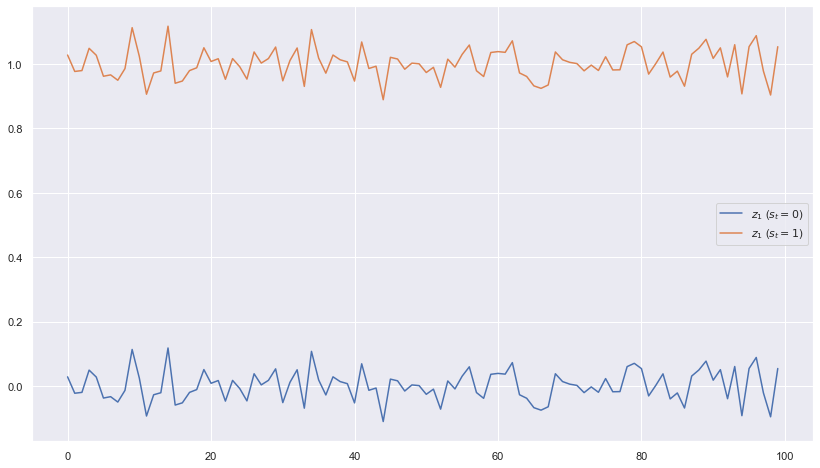

In [15]:
plt.figure(figsize=(14,8))
plt.plot(z1, label='$z_1$ ($s_t = 0$)')
plt.plot(z2, label='$z_1$ ($s_t = 1$)')
plt.legend()
plt.show()

In [16]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

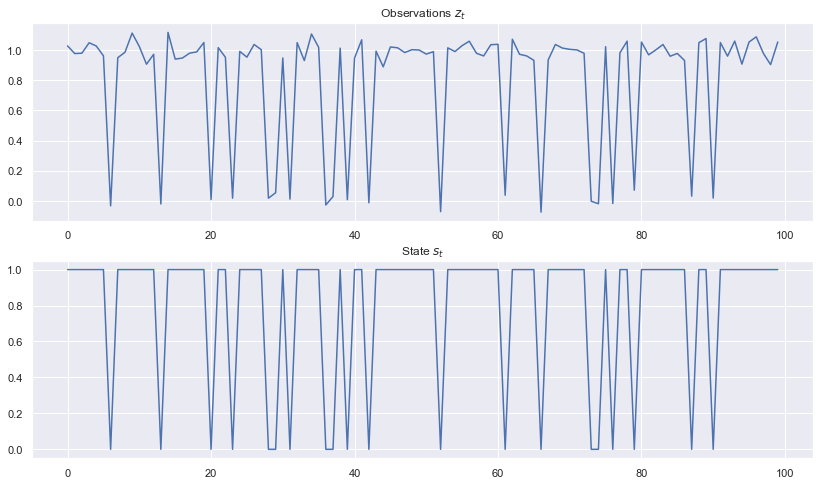

In [17]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

Это стационарный AR(1) процесс со средним $\dfrac{\alpha_0}{1-\beta}$ при $s_t=0$ и переключающийся на другой стационарный AR(1) процесс со средним $\dfrac{\alpha_0+\alpha_1}{1-\beta}$, когда $s_t$ переключается с 0 на 1.

- если $a_1 \ne 0$: два динамических паттерна в зависимости от значения переменной состояния $s_t$;
- в этом случае $z_t$ управляется двумя распределениями с разным средним;
- переменная $s_t$ отвечает за переключение между этими распределениями (режимами).

Только что показанный пример: $s_t \sim Bern(p),p=0.8$.

В этой модели $s_t$ не зависит от предыдущих и будущих реализаций, поэтому $z_t$ может сильно "прыгать" (часто переключаться между разными состояниями).

### Практика. Сгенерируйте модель с переключениями на основе двух моделей AR(1)

## Что такое модель с марковским переключением?

Пусть, как раньше,

$z_t = \begin{cases} \alpha_0 + \beta z_{t-1} + \epsilon_t, & s_t = 0 \\ \alpha_0 + \alpha_1 + \beta z_{t-1} + \epsilon_t, & s_t = 1 \end{cases}$

Обозначим $s_t$ ненаблюдаемую переменную состояния, принимающую значения 0 или 1 согласно марковской цепи первого порядка:

$P=\begin{pmatrix} P(s_t=0|s_{t-1}=0) & P(s_t=1|s_{t-1}=0 \\ P(s_t=0|s_{t-1}=1) & P(s_t=1|s_{t-1}=1 \end{pmatrix} = \begin{pmatrix} p_{00} & p_{01} \\ p_{10} & p_{11} \end{pmatrix}$

где за $p_{ij},i,j∈\{0,1\}$ обозначена вероятность перехода в состояние $s_t=j$ из состояния $s_{i−1}=i$.

- Матрица перехода управляет случайным поведением переменной состояния и зависит только от двух параметров ($p00$
 и $p11$).
- Модель такого типа называют моделью с марковскими переключениями.
- Свойства $z_t$ определяются характеристиками распределения как $\epsilon_t$, так и переменной состояния $s_t$.
- В частности, марковская переменная состояния приводит к случайным и частым сменам режима, а вероятности перехода определяют персистентность каждого из режимов.

Важный факт: распределение наблюдений обусловлено ненаблюдаемой переменной состояния:
$Law(z_t)=Law(z_t|s_t)$

Например:
- $Law(z_t|s_t=0) = N(\dfrac{\alpha_0}{1-\beta}, \sigma_\epsilon^2)$
- $Law(z_t|s_t=1) = N(\dfrac{\alpha_0 + \alpha_1}{1-\beta}, \sigma_\epsilon^2)$

# Как сгенерировать траекторию модели с марковскими переключениями?

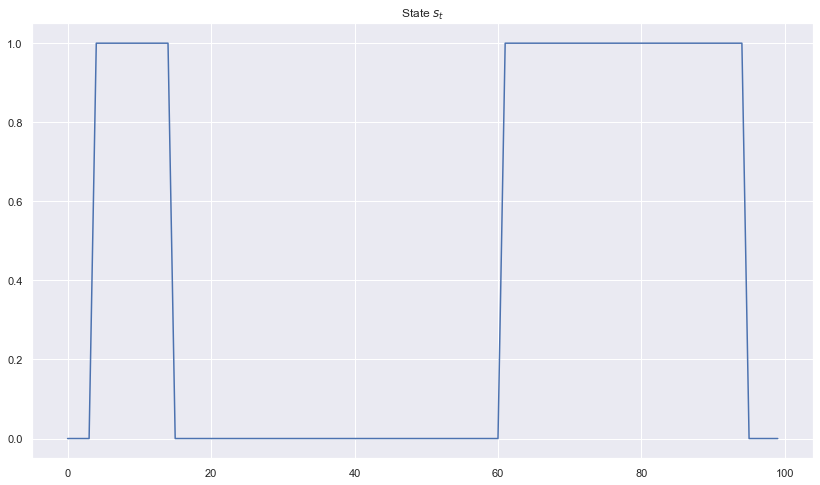

In [18]:
# 1. Генерирование марковской цепи с 2 скрытыми состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

In [19]:
# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])

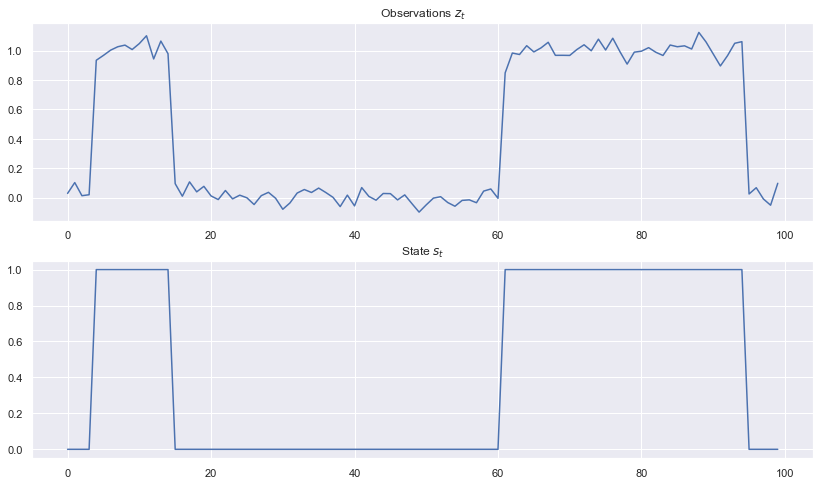

In [20]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()

# Что такое скрытые марковские модели?

**Определение.** Скрытая марковская модель (первого порядка) - это вероятностная модель последовательности, которая состоит из набора наблюдаемых переменных $X={x_1,…,x_n}$, где $x_k \in R^d$, и набора латентных (или скрытых) 
переменных

$T={t_1,...,t_n}, t_k \in \{0,1\}^K, \sum \limits_{i=1}^K t_{ki} = 1$.

- латентные переменные являются бинарными и кодируют $K$ состояний: переменные состояния;
- значения наблюдаемого вектора $x_k$ в момент времени $k$ зависят только от скрытого состояния $t_k$;
- $t_k$, в свою очередь, зависит только от $t_{k−1}$.

Пусть в скрытой марковской модели $K$ состояний. Закодируем их состояния в момент времени $n$ бинарным вектором $t_n=(t_{n1},…,t_{nK})$ по правилу:

$t_{ij} = \begin{cases} 1, & \mbox{ система находится в состоянии j в момент времени i} \\ 0, & \mbox{иначе} \end{cases}$

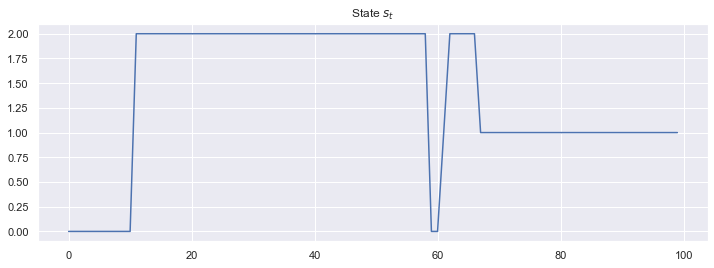

In [21]:
P = np.array([
    [0.95, 0.025, 0.025],
    [0.025, 0.95, 0.025],
    [0.025, 0.025, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1, 2], p=distribution))
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(s)
_ = axs.set_title('State $s_t$')
plt.show()

In [22]:
np.array(s)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

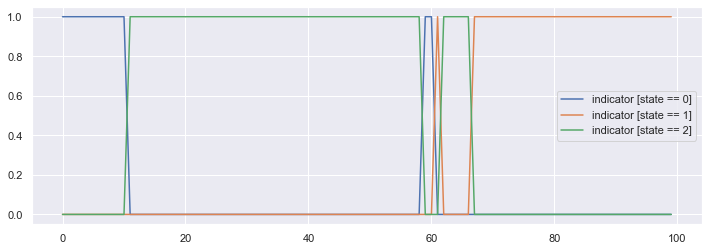

In [23]:
t = np.zeros((3, 100))
for i in range(3):
    t[i, :] = (np.array(s) == i).astype(int)
    
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
for i in range(3):
    _ = axs.plot(t[i, :], label='indicator [state == {}]'.format(i))
_ = axs.legend()

In [24]:
a, b = np.where(t)
assert np.all(np.array(a[np.argsort(b)]) == np.array(s))

Свойства такого формализма:

- в векторе $t_n$ может быть только один ненулевой элемент;
- предполагается, что система не может находиться в двух разных состояниях одновременно;
- распределение $t_n$ относительно $t_{n−1} -- p(t_n∣t_{n−1})$: матрица $A$, где $A_{ij}=p(t_{nj}=1∣t_{n−1,i}=1)$.

Стоит заметить, что $\sum \limits_{j=1}^K A_{ij}=1$. Следовательно, распределение можно записать следующим образом:

$p(t_n|t_{n-1}) = \prod\limits_{i=1}^K \prod\limits_{j=1}^K A_{ij}^{t_{n-1,i^{t_{nj}}}}$

- Начальное распределение $p(t1)$. Пусть $\pi_i=p(t_{1i}=1)$. Тогда

$p(t_1)=\prod\limits_{i=1}^K \pi_i^{t_{1i}}$.

- Обычно используются матрицы $A$ с преобладающими элементами на диагонали (более вероятно, что система не изменит своего состояния).
- Переменная $x_n$ зависит только от переменной состояния $t_n$: разумно рассматривать условное распределение $p(x_n∣t_n)$. Обычно предполагается, что оно известно с точностью до параметров $phi_k,k \in \{1,…,K\}$: то есть, если $t_{ni}=1$, то $p(x_n∣t_n)=p(x_n∣\phi_i)$.

$p(x_n∣t_n)=\prod\limits_{k=1}^K p(x_n∣\phi_k)^{t_{nk}}$.

Введённых параметров достаточно для полного описания скрытой марковской модели. Их собирают в набор параметров
$\Theta=(\pi,A,\phi)$, где $\pi=(\pi_1,…,\pi_K),\phi=(\phi1,…,\phi_K)$.


Основные задачи теории скрытых марковских процессов:
    
- **Обучение с учителем**. Пусть есть некоторая последовательность $X$, для которой известны латентные переменные $T$. По обучающей выборке нужно оценить набор параметров $\Theta$.
- **Сегментация**. Пусть известна последовательность наблюдаемых переменных $X$ и набор параметров $\Theta$. По ним нужно построить максимально правдоподобный набор латентных переменных $T$, то есть найти $argmax_T p(T∣X,\Theta)$.
- **Обучение без учителя**. Пусть известна последовательность наблюдаемых переменных $X$ и число состояний $K$. Нужно оценить набор параметров $\Theta$. Подзадача - **нахождение маргинального распределения**: найти $p(t_n∣X,\Theta)$.
- **Прогнозирование**. Пусть известна некоторая последовательность X длины N. Нужно оценить наблюдаемый вектор в момент времени $N+1$, то есть найти $p(x_{N+1}∣X)$.

# Как сгенерировать траекторию скрытой марковской модели?

In [37]:
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

No handles with labels found to put in legend.


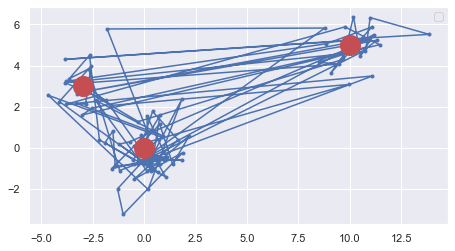

In [38]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

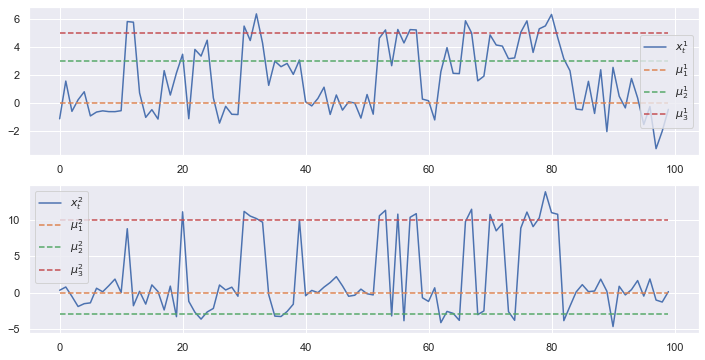

In [27]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

# Прогноз с использованием HMM

In [28]:
from hmmlearn.hmm import GaussianHMM

In [39]:
series = pd.read_csv('daily-total-female-births-in-cal.csv')["Count"]

In [40]:
values = series.values.reshape(-1,1)

In [50]:
for n in range(1, 21):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1245.3909354932182
2 -1231.4128457923264
3 -1228.6165019678801
4 -1222.4703311135693
5 -1214.0832255520304
6 -1207.2119251061506
7 -1200.0566699769408
8 -1191.2120452545507
9 -1173.492223463478
10 -1160.8837183439082
11 -1165.3294542875037
12 -1153.8724364369639
13 -1134.5392444561342
14 -1128.560085549634
15 -1117.528880619719
16 -1103.8954872263932
17 -1086.674367819663


Fitting a model with 398 free scalar parameters with only 365 data points will result in a degenerate solution.


18 -1037.4681010619327


Fitting a model with 439 free scalar parameters with only 365 data points will result in a degenerate solution.


19 -1072.7444132678525
20 -1068.3405483350678


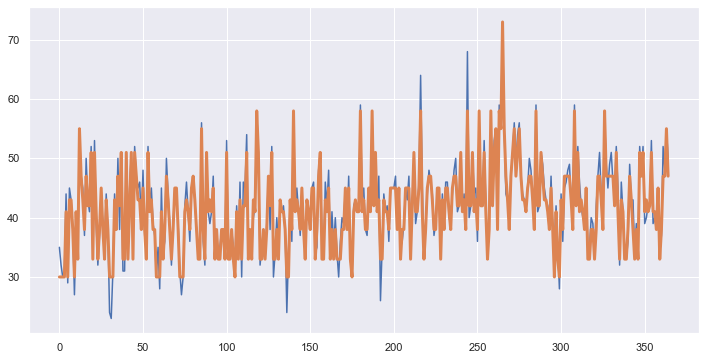

In [54]:
model = GaussianHMM(n_components=16,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [43]:
model.transmat_.shape

(10, 10)

In [55]:
model.score(X)

-6666.164255374054

Эксперименты:
 * поварьировать число компонент HMM,
 * Для обучения HMM необходимо задать какое-то начальное приближение ее параметров. В этот процесс можно вмешаться с помощью явного задания априорного распределения с помощью спецификации model.transmat_. Другие параметры модели доступны по `model.<TAB>`
 * HMM обучается на основе градиентного спуска в пространстве параметров (оптимизируется правдоподобие выборки). Различные инициализации приводят (в общем случае) к различным результатам оптимизации. Попробуйте обучить набор моделей HMM для понимания, насколько устойчиво обучение. Посмотрите на model.score(X) для оценки логарифма правдоподобия обучающей выборки.
 * Число итераций, заданное для обучения, влияет на качество модели. Модель будет продолжать оптимизацию, пока не прошло n_iter шагов градиентного спуска или пока изменение score выше, чем заданный порог tol. Заметьте, что в зависимости от используемых данных модель может и не окончить оптимизацию за n_iter шагов.

## Практика. Спрогнозируйте ряд на 10 измерений вперед (через среднее каждой компоненты)

# Материалы

- http://quantile.ru/11/11-CK.pdf

# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.